In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ler.rates import LeR
from ler.utils import get_param_from_json

In [35]:
import ler
import gwsnr
print(f"ler version: {ler.__version__}")
print(f"gwsnr version: {gwsnr.__version__}")

ler version: 0.3.7
gwsnr version: 0.2.4


In [12]:
ler = LeR(verbose=True, 
          event_type='BNS', 
          mtot_max=51, 
          z_max=5,
          psds={'L1':'custom_psd.txt'},
          )

z_to_luminosity_distance interpolator will be generated at ./interpolator_pickle/z_to_luminosity_distance/z_to_luminosity_distance_1.pickle
differential_comoving_volume interpolator will be generated at ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_2.pickle
merger_rate_density_bbh_popI_II_oguri2018 interpolator will be generated at ./interpolator_pickle/merger_rate_density_bbh_popI_II_oguri2018/merger_rate_density_bbh_popI_II_oguri2018_2.pickle
binary_masses_BNS_bimodal interpolator will be loaded from ./interpolator_pickle/binary_masses_BNS_bimodal/binary_masses_BNS_bimodal_0.pickle
z_to_Dc interpolator will be generated at ./interpolator_pickle/z_to_Dc/z_to_Dc_1.pickle
Dc_to_z interpolator will be generated at ./interpolator_pickle/Dc_to_z/Dc_to_z_1.pickle
angular_diameter_distance interpolator will be generated at ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_1.pickle
differential_comoving_volume interpolator will be gene

## Un-lensed events

In [19]:
# snr_cut=8.0
ler.selecting_n_unlensed_detectable_events(size=300, batch_size=100000,snr_threshold=8.0, output_jsonfile='n_unlensed_detectable_bns.json', meta_data_file='n_unlensed_detectable_bns_meta.json', resume=True);

collected number of detectable events =  200
collected number of detectable events =  201
total number of events =  47400000
total unlensed rate (yr^-1): 0.3969272665543733
collected number of detectable events =  203
total number of events =  47500000
total unlensed rate (yr^-1): 0.400032840454516
collected number of detectable events =  203
total number of events =  47600000
total unlensed rate (yr^-1): 0.3991924353275107
collected number of detectable events =  204
total number of events =  47700000
total unlensed rate (yr^-1): 0.4003178965418368
collected number of detectable events =  205
total number of events =  47800000
total unlensed rate (yr^-1): 0.40143864871342505
collected number of detectable events =  205
total number of events =  47900000
total unlensed rate (yr^-1): 0.4006005722025411
collected number of detectable events =  206
total number of events =  48000000
total unlensed rate (yr^-1): 0.401716065665788
collected number of detectable events =  206
total number of

In [30]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_unlensed_detectable_bns_meta.json')
meta_data.keys()

dict_keys(['events_total', 'detectable_events', 'total_rate'])

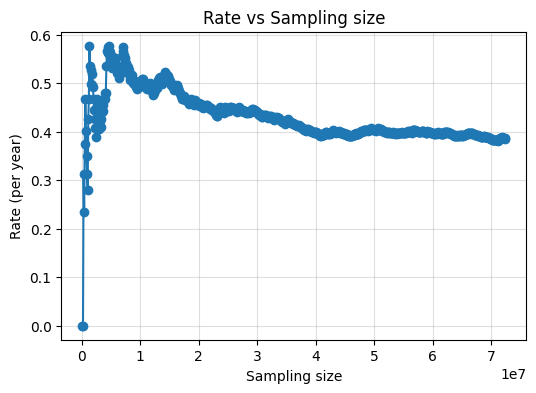

In [31]:
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [32]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 4e7)[0]
# take average 
rate_unlensed = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_unlensed)

Rate (per year) = 0.39637402431834423


## Lensed events

In [25]:
# snr_cut=8.0
# time will take long time sample
ler.selecting_n_lensed_detectable_events(size=20, batch_size=100000,snr_threshold=8.0, num_img=1, output_jsonfile='n_lensed_detectable_bns.json', meta_data_file='n_lensed_detectable_bns_meta.json', resume=True);

collected number of detectable events =  17.0


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.19s/it]


collected number of events =  17.0
total number of events =  3900000
total lensed rate (yr^-1): 0.000844834703754731


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.04s/it]


collected number of events =  17.0
total number of events =  4000000
total lensed rate (yr^-1): 0.0008237138361608627


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.37s/it]


collected number of events =  19.0
total number of events =  4100000
total lensed rate (yr^-1): 0.0008981671671194486


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.27it/s]


collected number of events =  19.0
total number of events =  4200000
total lensed rate (yr^-1): 0.0008767822345689855


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  20.0
total number of events =  4300000
total lensed rate (yr^-1): 0.0009014652105727636
storing detectable lensed params in ./ler_data/n_lensed_detectable_bns.json

 trmming final result to size=20


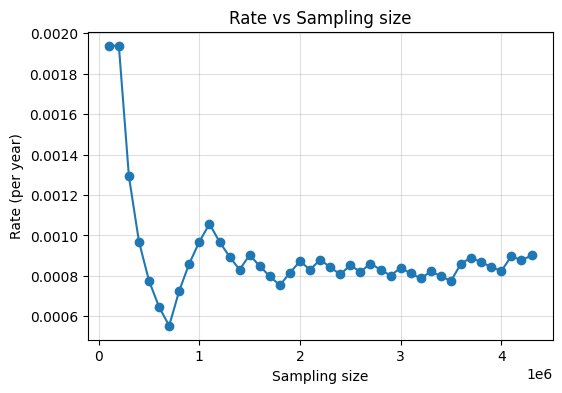

In [26]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_lensed_detectable_bns_meta.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [29]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 2e6)[0]
# take average 
rate_lensed = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_lensed)

Rate (per year) = 0.0008403548769430263


## rate comparison

In [33]:
rate_unlensed/rate_lensed

471.67456891574307